# Machine Learning Boilerplate Workflow (Decision Tree Example)

## 1. Define Problem
- Goal: Predict if a tumor is malignant (0) or benign (1) based on clinical features.
- Decision Trees are intuitive "if-else" models but prone to overfitting.
    - ID3, C4.5, CART (Classification and Regression Trees), CHAID. These define how the tree splits nodes based on feature values to create pure subsets for classification or regression tasks. 
- Ensembles (Random Forest, Boosting) help improve generalization. Boosting Example: AdaBoost, Gradient Boosting Machines (GBM), XGBoost, LightGBM, and CatBoost.
- Rotation Forest is another technique that applies principal component analysis (PCA) on random subsets of features before training each tree to increase diversity and potentially improve ensemble accuracy.
- Other techniques are Pruning (reduce tree size to prevent overfitting), 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_breast_cancer # dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    AdaBoostClassifier, GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.linear_model import LogisticRegression


# Advanced libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

## 2. EDA

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

In [3]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [5]:
print("Dataset shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))

Dataset shape: (569, 30)
Target distribution:
 target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


In [6]:
print(X.describe().T.head())  # summary statistics

                 count        mean         std        min        25%  \
mean radius      569.0   14.127292    3.524049    6.98100   11.70000   
mean texture     569.0   19.289649    4.301036    9.71000   16.17000   
mean perimeter   569.0   91.969033   24.298981   43.79000   75.17000   
mean area        569.0  654.889104  351.914129  143.50000  420.30000   
mean smoothness  569.0    0.096360    0.014064    0.05263    0.08637   

                       50%       75%        max  
mean radius       13.37000   15.7800    28.1100  
mean texture      18.84000   21.8000    39.2800  
mean perimeter    86.24000  104.1000   188.5000  
mean area        551.10000  782.7000  2501.0000  
mean smoothness    0.09587    0.1053     0.1634  


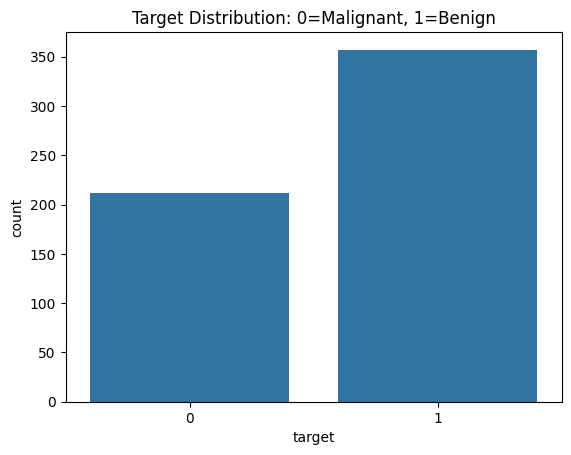

In [7]:
# Visualize class balance
sns.countplot(x=y)
plt.title("Target Distribution: 0=Malignant, 1=Benign")
plt.show()

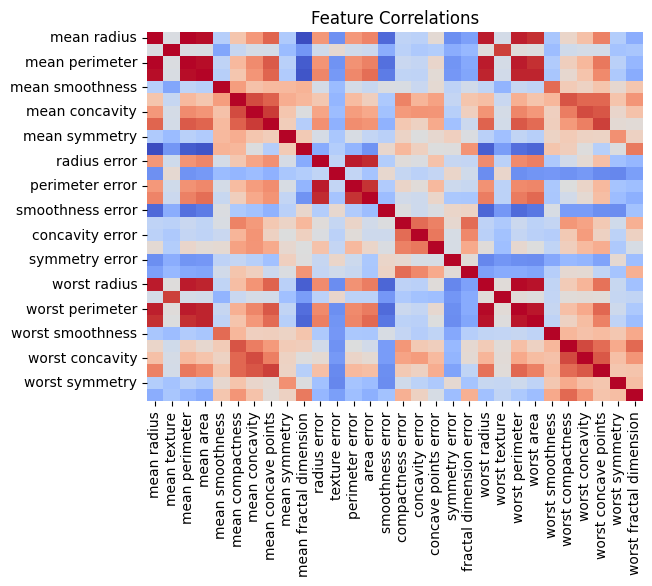

In [8]:
# Quick correlation heatmap (to see redundancy)
sns.heatmap(X.corr(), cmap="coolwarm", cbar=False)
plt.title("Feature Correlations")
plt.show()

## 3. Data Preparation

In [9]:
# Stratified Split ensures class proportions are similar across splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (455, 30)
X_test Shape:  (114, 30)
y_train Shape:  (455,)
y_test Shape:  (114,)


## 4 Baseline Decision Tree

In [10]:
# Decision Trees work with both numerical/categorical data, but this dataset is numerical

print("\n--- Decision Tree ---")
dt = DecisionTreeClassifier(criterion="gini", random_state=42)
dt.fit(X_train, y_train)
print("Accuracy:", dt.score(X_test, y_test))


--- Decision Tree ---
Accuracy: 0.9122807017543859


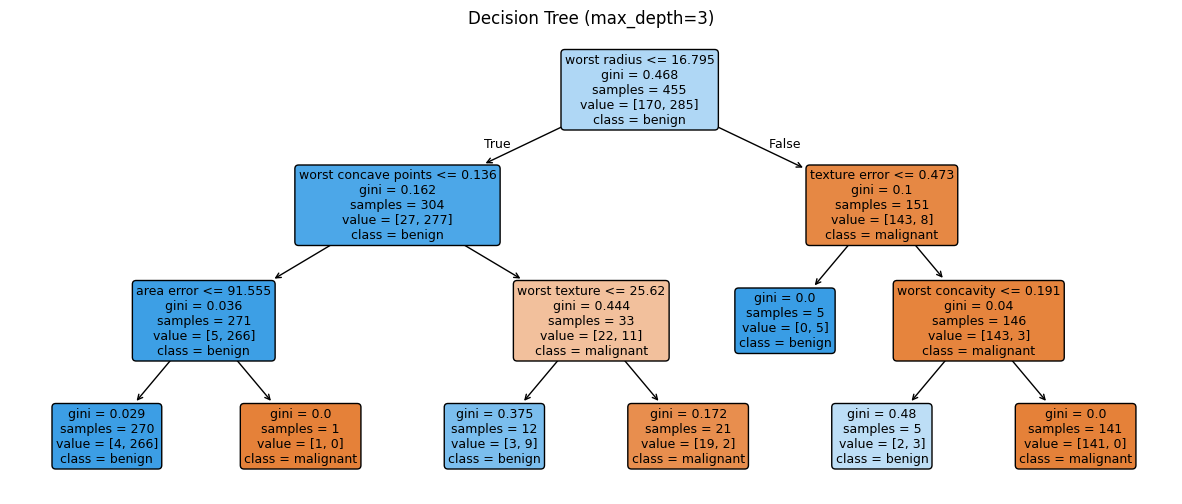

In [11]:
# Visualize tree (small depth for clarity)
small_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
small_dt.fit(X_train, y_train)
plt.figure(figsize=(15,6))
plot_tree(small_dt, feature_names=X.columns, class_names=data.target_names, filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree (max_depth=3)")
plt.show()

## 5.1 Ensemble Tree Methods ("Bagging")

In [12]:
print("\n--- Random Forest (Bagging) ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Accuracy:", rf.score(X_test, y_test))


--- Random Forest (Bagging) ---
Accuracy: 0.956140350877193


## 5.2 Ensemble Tree with (Extra Trees)

In [13]:
print("\n--- Extra Trees (Bagging, More Randomization) ---")
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
print("Accuracy:", et.score(X_test, y_test))


--- Extra Trees (Bagging, More Randomization) ---
Accuracy: 0.956140350877193


## 6. Boosting Variants

### 6.1 AdaBoost

In [14]:
print("\nAdaBoost (Boosting: Trees built sequentially)")
ab = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ab.fit(X_train, y_train)
print("AdaBoost Test Accuracy:", ab.score(X_test, y_test))


AdaBoost (Boosting: Trees built sequentially)
AdaBoost Test Accuracy: 0.956140350877193


In [ ]:
print("\n--- Gradient Boosting ---")
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
print("Accuracy:", gb.score(X_test, y_test))

### 6.2 Gradient Boosting

In [15]:
print("\nGradient Boosting (Boosting: Residuals targeted)")
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
print("Gradient Boosting Test Accuracy:", gb.score(X_test, y_test))


Gradient Boosting (Boosting: Residuals targeted)
Gradient Boosting Test Accuracy: 0.956140350877193


### 6.3 XGBoost

In [16]:
print("\nXGBoost (Optimized Gradient Boosting)")
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, eval_metric="logloss", random_state=42, use_label_encoder=False)
xgb.fit(X_train, y_train)
print("XGBoost Test Accuracy:", xgb.score(X_test, y_test))


XGBoost (Optimized Gradient Boosting)
XGBoost Test Accuracy: 0.9473684210526315


In [ ]:
print("\n--- XGBoost ---")
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=3,
subsample=0.8, colsample_bytree=0.8, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
print("Accuracy:", xgb.score(X_test, y_test))

### 6.4 LightGBM

In [17]:
print("\nLightGBM (Faster Gradient Boosting variant)")
lgbm = LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
lgbm.fit(X_train, y_train)
print("LightGBM Test Accuracy:", lgbm.score(X_test, y_test))


LightGBM (Faster Gradient Boosting variant)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [ ]:
print("\n--- LightGBM ---")
lgbm = LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
lgbm.fit(X_train, y_train)
print("Accuracy:", lgbm.score(X_test, y_test))

### 6.5 CatBoost

In [18]:
print("\nCatBoost (Handles categorical features)")
cat = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=6, verbose=0, random_state=42)
cat.fit(X_train, y_train)
print("CatBoost Test Accuracy:", cat.score(X_test, y_test))


CatBoost (Handles categorical features)
CatBoost Test Accuracy: 0.956140350877193


In [ ]:
print("\n--- CatBoost ---")
cat = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=6, verbose=0, random_state=42)
cat.fit(X_train, y_train)
print("Accuracy:", cat.score(X_test, y_test))

## 7 Stacking (Ensemble of Ensembles) 

In [19]:
# Combines predictions of several base models using a meta model (here, Logistic Regression)
stack = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(eval_metric="logloss", random_state=42, use_label_encoder=False))
    ],
    final_estimator=LogisticRegression(max_iter=1000)
)
stack.fit(X_train, y_train)
print("Stacking Test Accuracy:", stack.score(X_test, y_test))

Stacking Test Accuracy: 0.956140350877193


# 8. Cross-Validation & Model Selection

In [20]:
print("\n--- Cross-Validation Comparison ---")
models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Extra Trees": et,
    "AdaBoost": ab,
    "Gradient Boosting": gb,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "CatBoost": cat,
    "Stacking": stack
}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name:20}: Mean CV Accuracy={scores.mean():.4f} (+/- {scores.std():.4f})")


--- Cross-Validation Comparison ---
Decision Tree       : Mean CV Accuracy=0.9099 (+/- 0.0189)
Random Forest       : Mean CV Accuracy=0.9538 (+/- 0.0235)
Extra Trees         : Mean CV Accuracy=0.9714 (+/- 0.0256)
AdaBoost            : Mean CV Accuracy=0.9736 (+/- 0.0215)
Gradient Boosting   : Mean CV Accuracy=0.9560 (+/- 0.0098)
XGBoost             : Mean CV Accuracy=0.9670 (+/- 0.0220)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 228, number of negative: 136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3642
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with

## 9. Hyperparameter Tuning with GridSearch

In [21]:
# Grid search for Decision Tree (try more params as desired)
param_grid = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid.fit(X_train, y_train)
print("Best GridSearchCV DT params:", grid.best_params_)
print("Best GridSearchCV DT Accuracy (CV):", grid.best_score_)
best_dt = grid.best_estimator_
print("Test Accuracy (tuned DT):", best_dt.score(X_test, y_test))

Best GridSearchCV DT params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Best GridSearchCV DT Accuracy (CV): 0.9384615384615385
Test Accuracy (tuned DT): 0.9210526315789473


## 10. Advanced: Cost-Complexity Pruning for Decision Trees

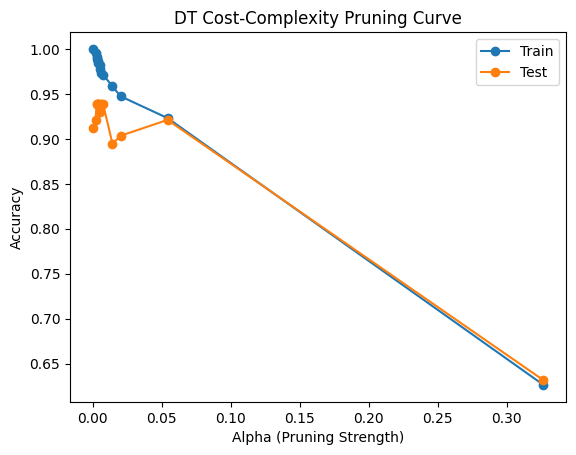

In [22]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
train_scores, test_scores = [], []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))


plt.plot(ccp_alphas, train_scores, marker='o', label="Train")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test")
plt.xlabel("Alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("DT Cost-Complexity Pruning Curve")
plt.legend()
plt.show()

## 11. Evaluation: ROC, Confusion Matrix, Feature Importance

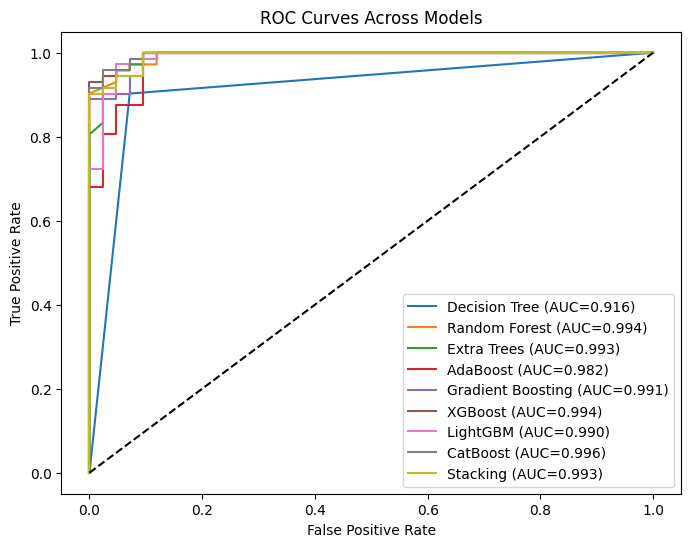

In [23]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc = roc_auc_score(y_test, y_probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across Models")
plt.legend()
plt.show()

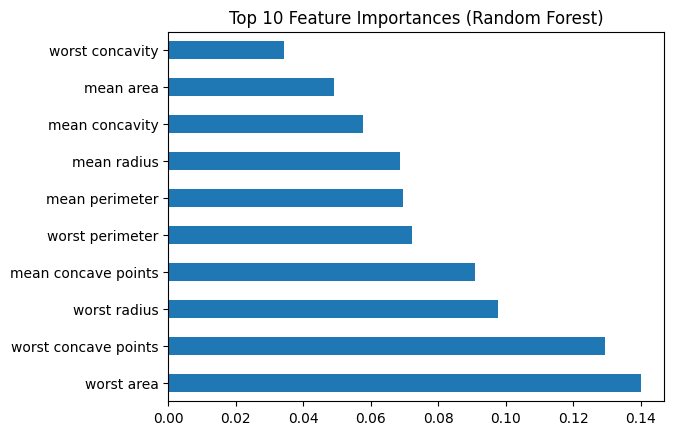

In [24]:
# Visualize Feature Importances for an ensemble model (e.g., Random Forest)
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind="barh")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [ ]:
# Model Evaluation (Confusion Matrix, Report, ROC for all models)
plt.figure(figsize=(8,6))
for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:,1]
    # Confusion Matrix (example: Random Forest only for visualization)
    if name == "Random Forest":
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title("Confusion Matrix (Random Forest)")
        plt.show()
        print(f"Classification Report ({name}):\n", classification_report(y_test, y_pred))
    
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

In [ ]:
# Plot ROC for all models
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across Models")
plt.legend()
plt.show()

In [ ]:
# --- Step 4: Feature Importances (example: Random Forest) ---
importances = pd.Series(fitted_models["Random Forest"].feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [ ]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

train_scores, test_scores = [], []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(ccp_alphas, train_scores, marker='o', label="Train")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test")
plt.xlabel("Alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("Cost-Complexity Pruning Curve")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Test Accuracy:", rf.score(X_test, y_test))

# Feature importance
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind="barh")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
print("AdaBoost Test Accuracy:", ada.score(X_test, y_test))

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
print("Gradient Boosting Test Accuracy:", gb.score(X_test, y_test))

In [ ]:
print("\n--- AdaBoost ---")
ab = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ab.fit(X_train, y_train)
print("Accuracy:", ab.score(X_test, y_test))

## 12. Learning Curve: Bias-Variance Exploration (for Decision Tree example)

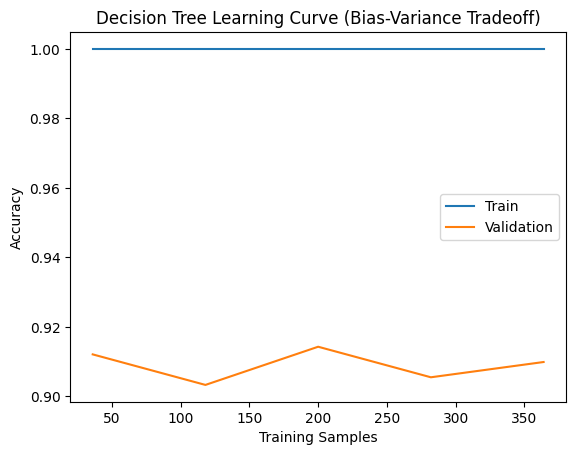

In [25]:
from sklearn.model_selection import learning_curve
sizes, train_scores, val_scores = learning_curve(
    dt, X_train, y_train, cv=5, scoring='accuracy'
)
plt.plot(sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(sizes, np.mean(val_scores, axis=1), label="Validation")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Decision Tree Learning Curve (Bias-Variance Tradeoff)")
plt.legend()
plt.show()

## 10. Save Model

In [ ]:
joblib.dump(fitted_models["Random Forest"], "random_forest_breast_cancer.pkl")
print("Random Forest model saved!")